In [8]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bayesian General Linear Models

Bayes Theorem and Bayesian inference is used to determine posterior probability distributions. 

Here, Bayesian Inference is applied to a General Linear Model (GLM) for regression. 

### The Model
The objective is to *develop a model to predict student grades* given several input factors for student demographics. The publicly avaliable [UCI dataset](https://archive.ics.uci.edu/ml/datasets/student+performance#) contains grades and factors for 649 students taking a Portugese language course. 

In [82]:
os.listdir('./data')
df = pd.read_csv('./data/student-por.csv',sep=';')
df = df.loc[~df['G3'].isin([0,1])].copy()
print(df.shape)

(633, 33)


***Features***

A subset of features is used to build the initial model:

    - number of past class failures (numeric: n if 1<=n<3, else 4) 
    - higher wants to take higher education (binary: yes or no) 
    - Medu mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
    -  Fedu father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
    -  studytime weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    - absences number of school absences (numeric: from 0 to 93) 

and the target:

    - G3 - the students final grade (numeric: from 0 to 20, output target)

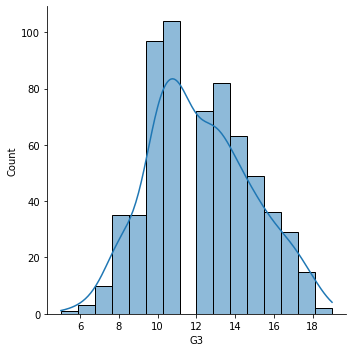

In [83]:
features = ['failures','higher','Medu','Fedu','studytime','absences']
target = ['G3']
sns.displot(data=df,x='G3',kde=True)

### GLM 

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.7327
Method:                          IRLS   Log-Likelihood:                -337.75
Date:                Sun, 27 Dec 2020   Deviance:                       343.08
Time:                        14:30:44   Pearson chi2:                     343.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2712      0.340     -3.742      0.0

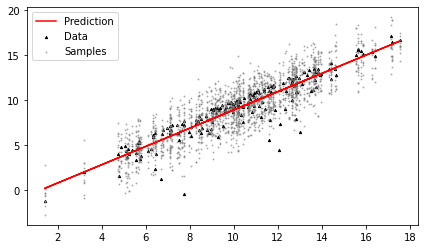

In [199]:
# recap on gaussian model
fig,axs = plt.subplots(1,1,figsize=(7,4))

# dummy data
n = 200
Xy = pd.DataFrame({'X':np.random.normal(loc=10,scale=3,size=n)})
Xy['y'] = Xy.X - np.random.gamma(shape=1,scale=1,size=n)

axs.scatter(Xy.X,Xy.y,c='black',s=5,marker='^',label='Data')

# fit model
Xym = smf.glm(formula='y~X',data=Xy).fit()
print(Xym.summary())

# prediction : plot mean
Xy['P'] = Xym.predict()
axs.plot(Xy.X,Xy.P,c='red',label='Prediction')

# predictions : plot 10 samples of model mean with standard deviation
for r in range(10):
    a = np.random.normal(loc=Xy.P,scale=Xym.scale)
    axs.scatter(Xy.X.values,a,c='grey',s=1,alpha=0.5)
axs.scatter(Xy.X.values,a,c='grey',s=1,alpha=0.5,label='Samples')
    
axs.legend();

In [200]:
# model grade data
formula = 'G3 ~ ' + ' + '.join(features)
glm = smf.glm(formula=formula,
              data=df,
              family=sm.families.Gaussian()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     G3   No. Observations:                  633
Model:                            GLM   Df Residuals:                      626
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          5.1417
Method:                          IRLS   Log-Likelihood:                -1412.9
Date:                Sun, 27 Dec 2020   Deviance:                       3218.7
Time:                        14:30:55   Pearson chi2:                 3.22e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.1919      0.407     22.604      0.000       8.395       9.989
higher[T.yes]     1.6572      0.321      5.159      0.000       1.028       2.287
failures         -1.2162      0.165     -7.370      0.000      -1.540      -0.893
Medu              0.4095      0.105      3.887      0.000       0.203       0.616
Fedu              0.0299      0.108      0.277      0.782      -0.182       0.241
studytime         0.4741      0.111      4.263      0.000       0.256       0.692
absences         -0.0656      0.020     -3.311      0.001      -0.105      -0.027
=================================================================================
"""

(0.0, 20.0)

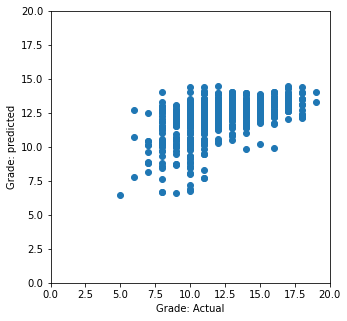

In [91]:
fig,axs = plt.subplots(1,1,figsize=(5,5))

yhat = glm.predict()
axs.scatter(df[target],yhat)
axs.set_xlabel('Grade: Actual')
axs.set_ylabel('Grade: predicted')
axs.set_xlim(0,20)
axs.set_ylim(0,20)